# Demo 2 #


In [1]:
# Slide 1: Dataset Import

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer

# Path to the folder containing the 22 CSV files (update with actual path)
path = r"C:\Users\sherv\Desktop\SP25\CS156-main\demo2\harth_data"  # Modify the path

# Using glob to find all CSV files in the directory
import glob
all_files = glob.glob(path + "/*.csv")

# List to hold dataframes
df_list = []


In [2]:
# Initialize the id value
current_id = 1

# Loop through each file and read it into a dataframe
for file in all_files:
    # Read the current CSV file
    df = pd.read_csv(file)
    
    # Add the 'id' column to store the subject identifier (current_id)
    df['id'] = current_id
    
    # Append the dataframe to the list
    df_list.append(df)
    
    # Increment the ID for the next file
    current_id += 1

In [3]:
# Concatenate all dataframes into a single DataFrame
combined_df = pd.concat(df_list, ignore_index=True)
combined_df = combined_df.drop(columns=['index'], errors='ignore')

# Display the first few rows of the combined dataset
combined_df.head()



,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label,id
0,2019-01-12 00:00:00.000,-0.760242,0.299570,0.468570,-5.092732,-0.298644,0.709439,6,1
1,2019-01-12 00:00:00.010,-0.530138,0.281880,0.319987,0.900547,0.286944,0.340309,6,1
2,2019-01-12 00:00:00.020,-1.170922,0.186353,-0.167010,-0.035442,-0.078423,-0.515212,6,1
3,2019-01-12 00:00:00.030,-0.648772,0.016579,-0.054284,-1.554248,-0.950978,-0.221140,6,1
4,2019-01-12 00:00:00.040,-0.355071,-0.051831,-0.113419,-0.547471,0.140903,-0.653782,6,1


In [ ]:
# Define the path where the new CSV file will be saved (you can modify this path)
output_path = r"C:\Users\sherv\Desktop\SP25\CS156-main\demo2\new_data"

# Save the combined DataFrame to a CSV file
combined_df.to_csv(output_path, index=False)
combined_df = combined_df.loc[:, ~combined_df.columns.str.contains('^Unnamed')]


# Confirm that the file has been saved
print(f"Combined dataset saved to {output_path}")

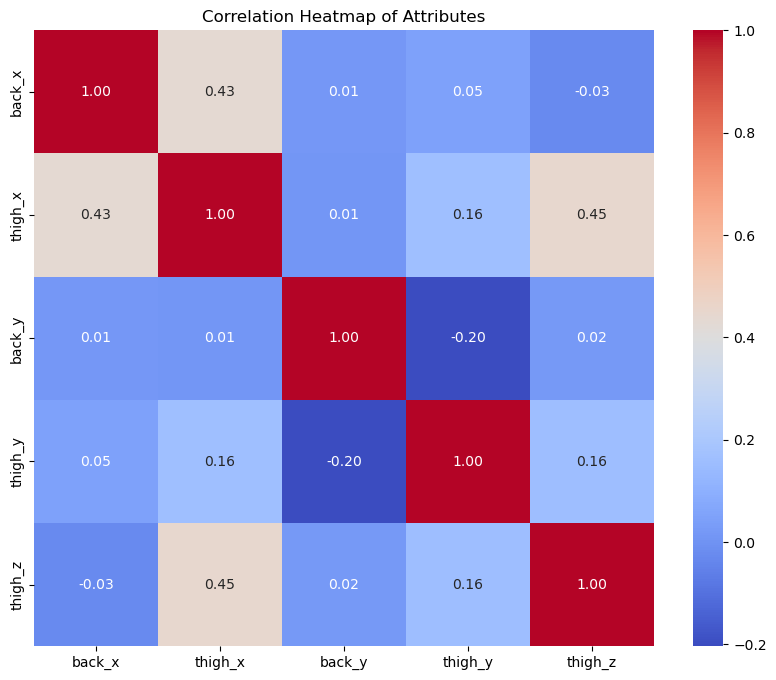

In [4]:
corr = combined_df[['back_x', 'thigh_x', 'back_y', 'thigh_y', 'thigh_z']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Attributes')
plt.show()



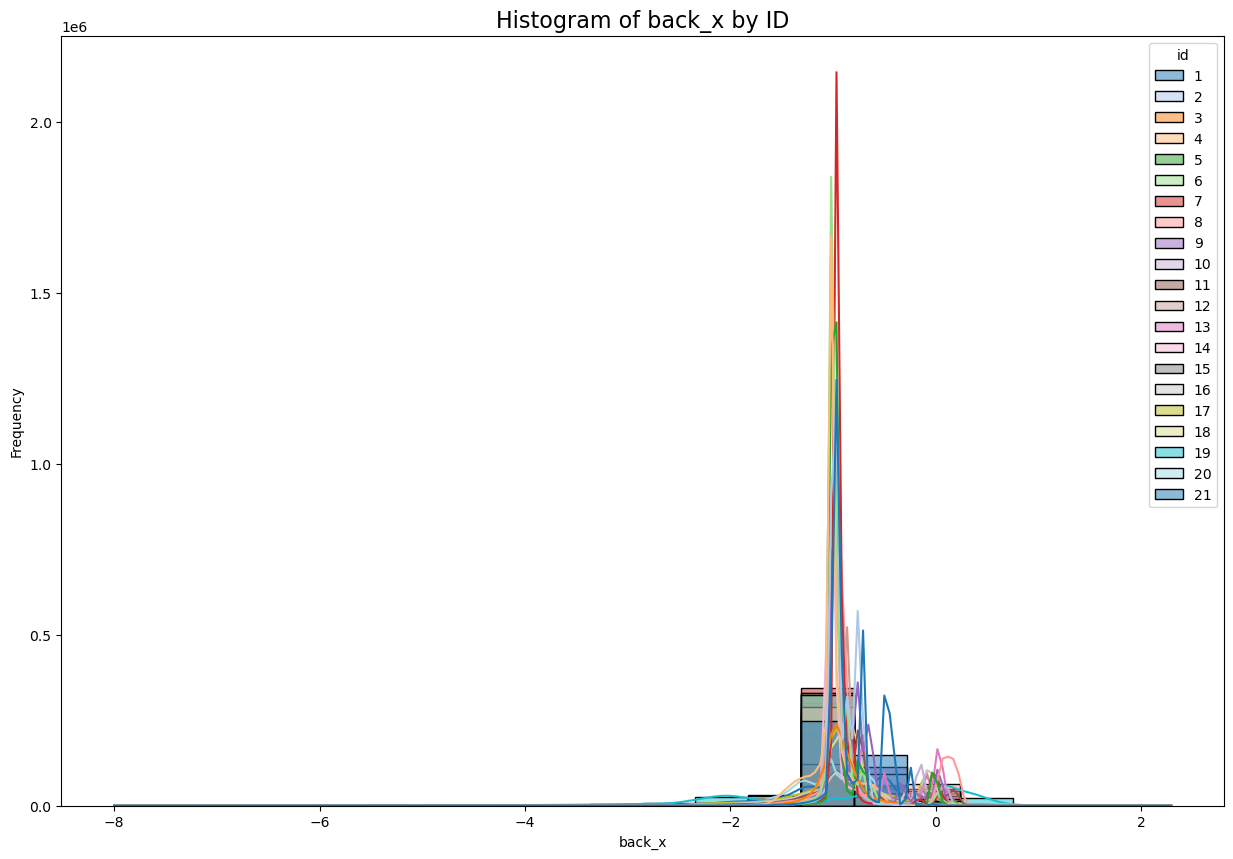

In [6]:
# Plot histograms for each attribute, grouped by 'id'
plt.figure(figsize=(15, 10))
sns.histplot(data=combined_df, x='back_x', hue='id', kde=True, bins=20, palette='tab20')
plt.title('Histogram of back_x by ID', fontsize=16)
plt.xlabel('back_x')
plt.ylabel('Frequency')
plt.show()


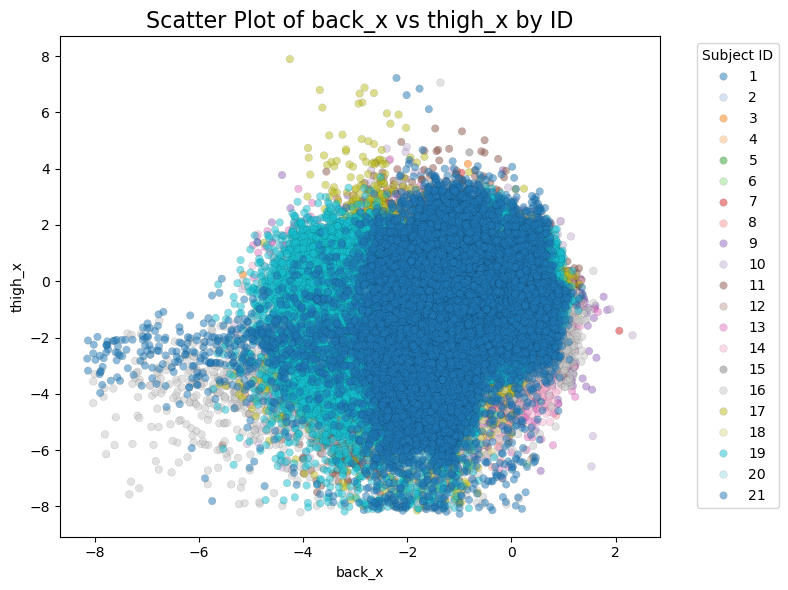

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy of the DataFrame to add jitter without affecting the original
jittered_df = combined_df.copy()

# Add small Gaussian noise to simulate jitter
jitter_strength = 0.1  # You can adjust this value (e.g., 0.01 to 0.1) as needed
jittered_df['back_x'] += np.random.normal(0, jitter_strength, size=len(jittered_df))
jittered_df['thigh_x'] += np.random.normal(0, jitter_strength, size=len(jittered_df))

# Plot the scatter plot with jittered data
plt.figure(figsize=(8, 6))
sns.scatterplot(data=jittered_df, x='back_x', y='thigh_x', hue='id',
                alpha=0.5, s=30, edgecolor='black', linewidth=0.1, palette='tab20')

plt.title('Scatter Plot of back_x vs thigh_x by ID', fontsize=16)
plt.xlabel('back_x')
plt.ylabel('thigh_x')
plt.legend(title='Subject ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Scatter plot of raw data (without grouping by 'id')
plt.figure(figsize=(8, 6))
sns.scatterplot(data=combined_df, x='back_x', y='thigh_x', color='b', s=100, edgecolor='w', alpha=0.7)

# Calculate the best fit line (linear regression)
slope, intercept, r_value, p_value, std_err = stats.linregress(combined_df['back_x'], combined_df['thigh_x'])

# Plot the best fit line
plt.plot(combined_df['back_x'], slope * combined_df['back_x'] + intercept, color='red', linewidth=2)

# Add title and labels
plt.title('Scatter Plot of back_x vs thigh_x with Best Fit Line', fontsize=16)
plt.xlabel('back_x')
plt.ylabel('thigh_x')

plt.show()


In [13]:
# Pair plot to visualize all pairwise relationships between attributes
sns.pairplot(combined_df)
plt.suptitle('Pair Plot of All Attributes', fontsize=16)
plt.show()


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the numerical columns
corr_matrix = combined_df[['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()
